In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading Data Sets
X_Train = pd.read_csv('C:/Users/Jaspreet Singh/Desktop/DS_Projects/AQI Prediction - Copy/2. Data Preparation/Lvl -3 Train_Test_Split and Data Scaling/X_Train.csv')
y_Train = pd.read_csv('C:/Users/Jaspreet Singh/Desktop/DS_Projects/AQI Prediction - Copy/2. Data Preparation/Lvl -3 Train_Test_Split and Data Scaling/y_Train.csv')

In [4]:
# Checking Datasets Shape
print(X_Train.shape)
print(y_Train.shape)

(30584, 16)
(30584, 2)


In [6]:
# Droping Index
X_Train = X_Train.drop('Unnamed: 0', 1)
y_Train = y_Train.drop('Unnamed: 0', 1)

<ipython-input-6-0456745b19ec>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_Train = X_Train.drop('Unnamed: 0', 1)
<ipython-input-6-0456745b19ec>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  y_Train = y_Train.drop('Unnamed: 0', 1)


In [7]:
print(X_Train.columns)
print(y_Train.columns)

Index(['PM10', 'NO2', 'SO2', 'CO', 'Temperature_in_°C', 'Relative_Temp_in_°C',
       'Wind_Speed_in_Kmph', 'Rel_Humidity', 'Dew_Point_in_°C',
       'Atmospheric_Pressure_in_mb', 'Thunder', 'Few_clouds', 'Rain', 'Clear',
       'Cloudy'],
      dtype='object')
Index(['PM2.5'], dtype='object')


### Correlation for Feature Selection

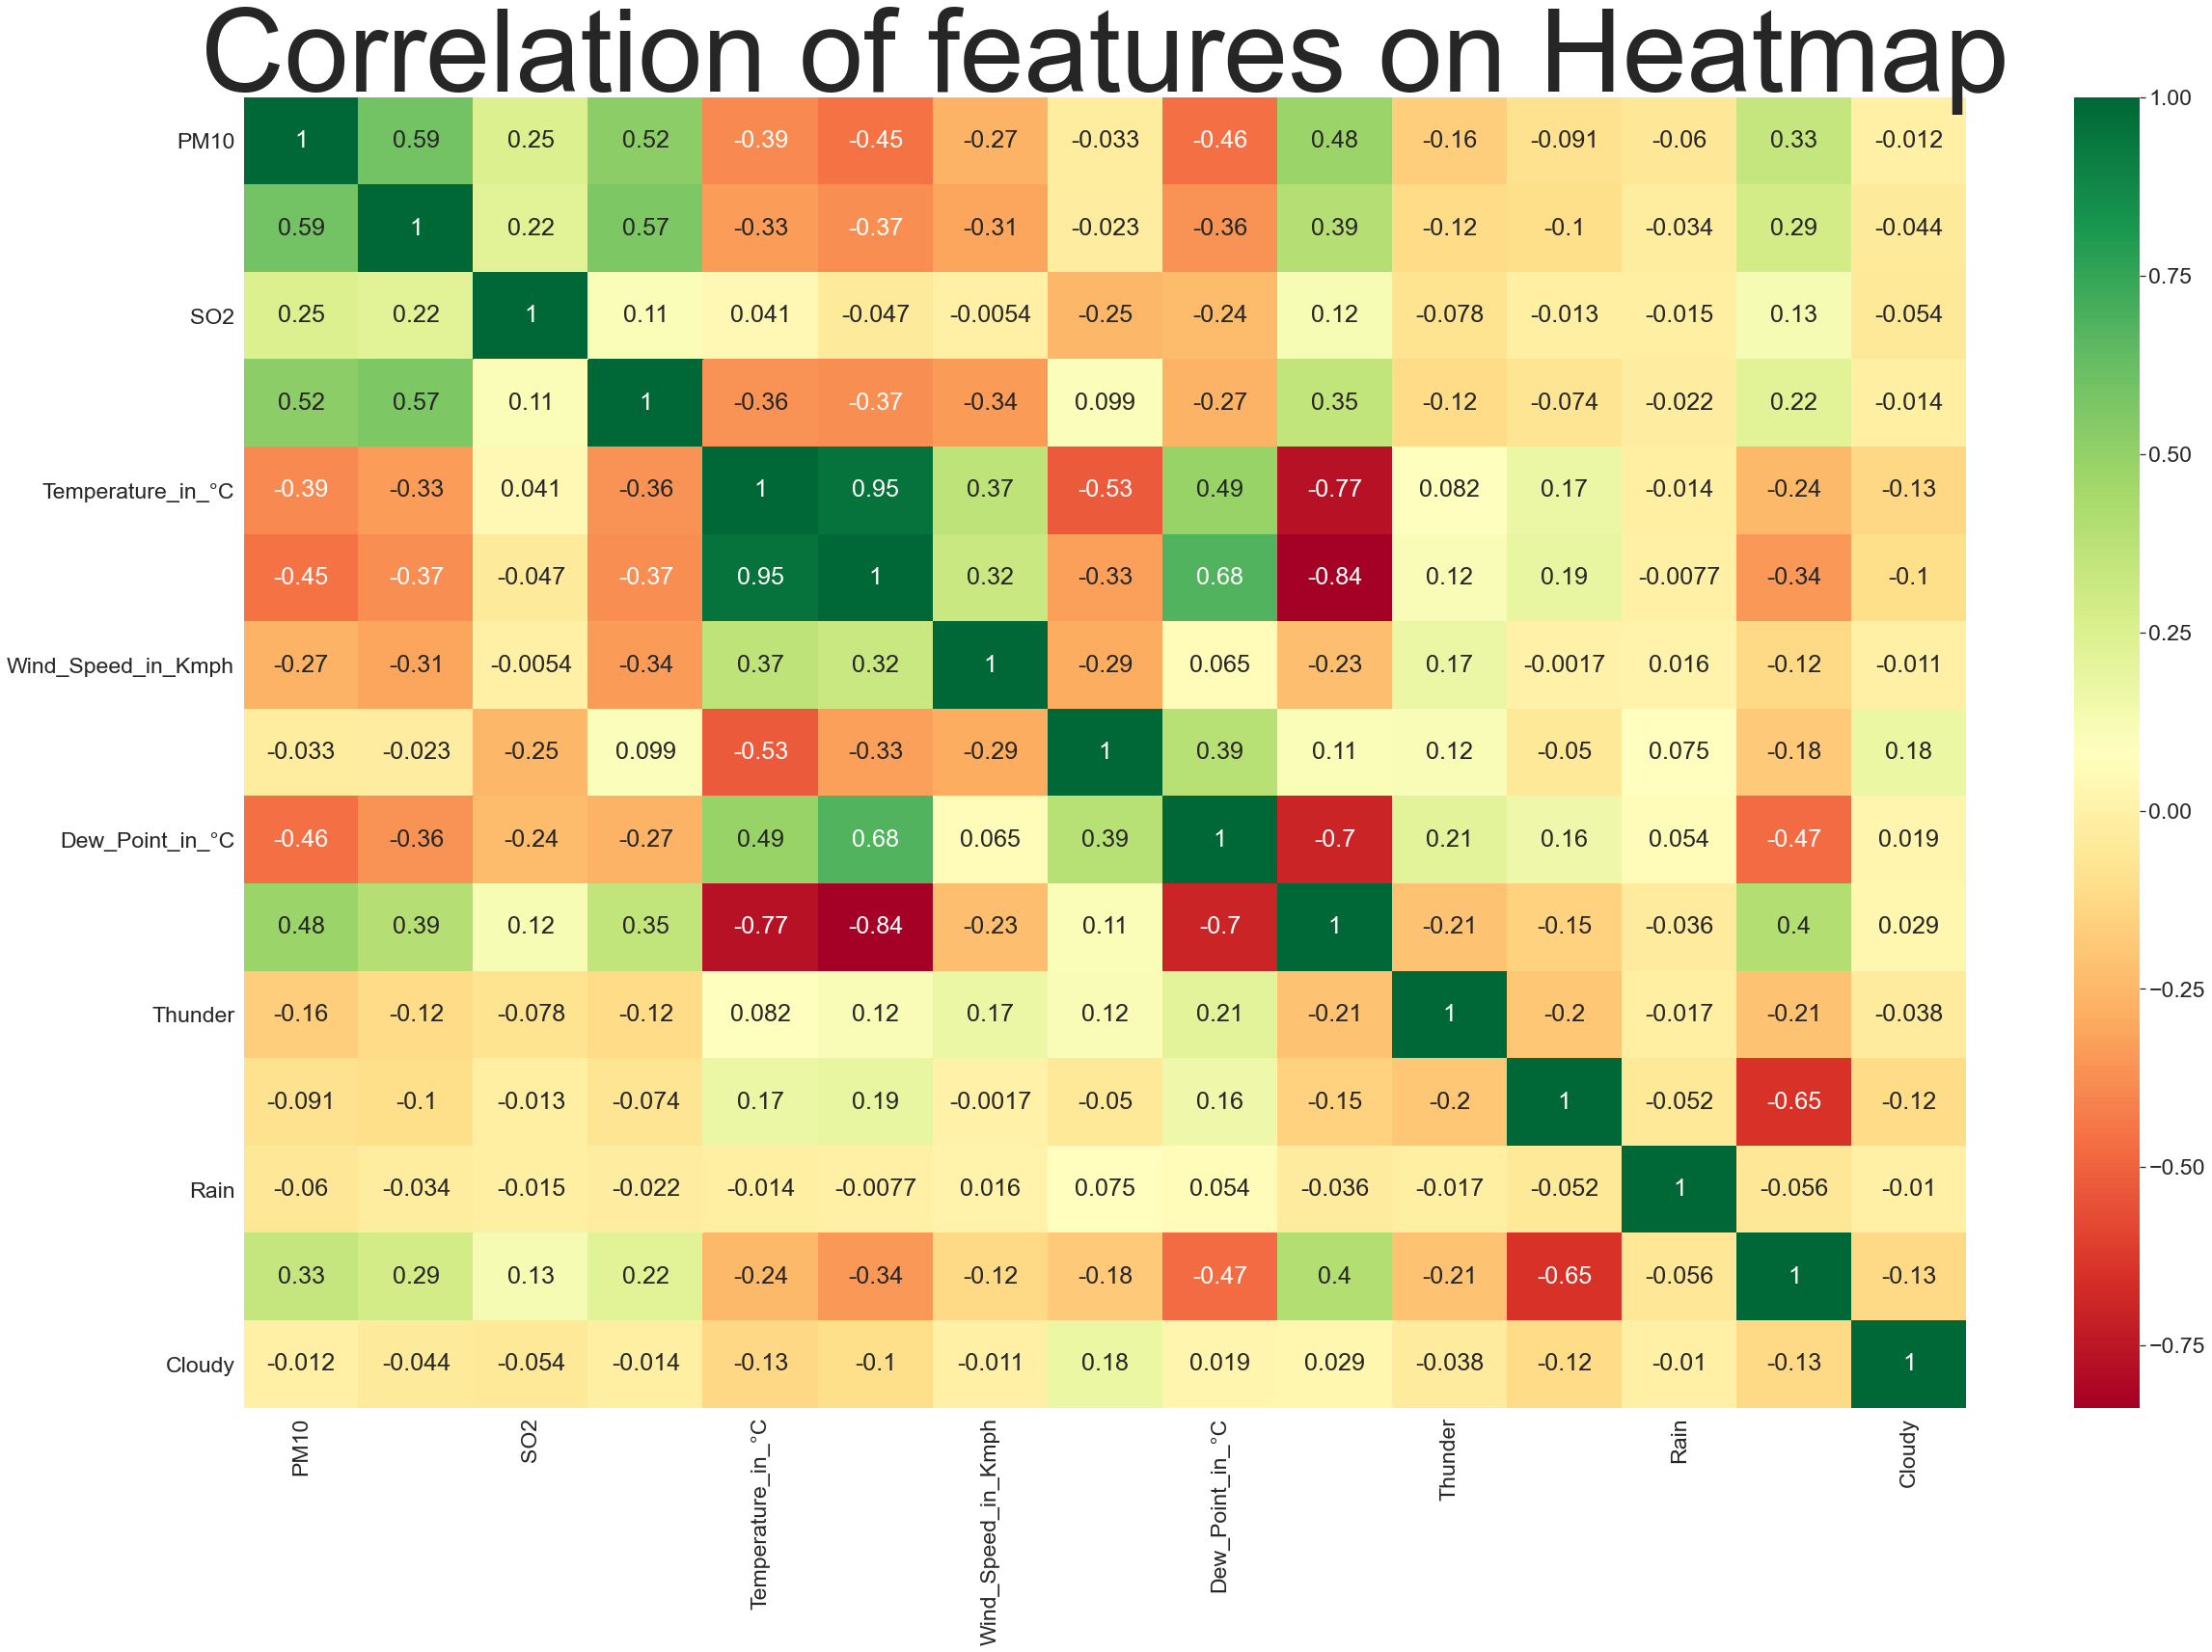

In [11]:
# Correlation Heat Map
sns.heatmap(X_Train.corr(), annot = True, cmap = 'RdYlGn')
plt.title("Correlation of features on Heatmap", fontsize = 120)
sns. set(font_scale=2.1)
fig = plt.gcf()
fig.set_size_inches(40, 25)
plt.show()

In [13]:
X_Correl = X_Train.corr()

In [38]:
def correl_in_features(df_corr, correl_threshold):
    d = {}
    for col in X_Correl.columns:
        l = df_corr[(df_corr[col] > correl_threshold) & (df_corr[col] < 1)].index.tolist()
        if len(l) > 0:
            d[col] = l
        else:
            pass
    return d

In [41]:
correl_in_features(X_Correl, 0.5)

{'PM10': ['NO2', 'CO'],
 'NO2': ['PM10', 'CO'],
 'CO': ['PM10', 'NO2'],
 'Temperature_in_°C': ['Relative_Temp_in_°C'],
 'Relative_Temp_in_°C': ['Temperature_in_°C', 'Dew_Point_in_°C'],
 'Dew_Point_in_°C': ['Relative_Temp_in_°C']}

In [42]:
correl_in_features(X_Correl, 0.7)

{'Temperature_in_°C': ['Relative_Temp_in_°C'],
 'Relative_Temp_in_°C': ['Temperature_in_°C']}

#### Above analysis show that Temperature and Relative Temperature are highly correlated to each other. 
I am not considering the high negative correlated features

In [49]:
# Using Lasso for Feature Selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [50]:
# To visualise all the columns in a dataframe.
pd.pandas.set_option('display.max_columns', None)

In [51]:
### Applying Feature Selection using Lasso
feature_selection_model = SelectFromModel(Lasso(alpha = 0.01, random_state = 10))
feature_selection_model.fit(X_Train, y_Train)

SelectFromModel(estimator=Lasso(alpha=0.01, random_state=10))

In [52]:
model_results = feature_selection_model.get_support()
model_results

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [53]:
model_dict = {}
n = -1
print("Model Approval to columns at alpha 1%")
for col in X_Train.columns:
    n += 1
    model_dict[col] = model_results[n]
model_dict    

Model Approval to columns at alpha 1%


{'PM10': True,
 'NO2': True,
 'SO2': True,
 'CO': True,
 'Temperature_in_°C': True,
 'Relative_Temp_in_°C': True,
 'Wind_Speed_in_Kmph': True,
 'Rel_Humidity': True,
 'Dew_Point_in_°C': True,
 'Atmospheric_Pressure_in_mb': True,
 'Thunder': True,
 'Few_clouds': True,
 'Rain': True,
 'Clear': True,
 'Cloudy': True}

In [54]:
### Applying Feature Selection using Lasso
feature_selection_model = SelectFromModel(Lasso(alpha = 0.05, random_state = 10))
feature_selection_model.fit(X_Train, y_Train)

SelectFromModel(estimator=Lasso(alpha=0.05, random_state=10))

In [55]:
model_results = feature_selection_model.get_support()
model_results

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True])

In [56]:
model_dict = {}
n = -1
print("Model Approval to columns at alpha 5%")
for col in X_Train.columns:
    n += 1
    model_dict[col] = model_results[n]
model_dict    

Model Approval to columns at alpha 5%


{'PM10': True,
 'NO2': True,
 'SO2': True,
 'CO': True,
 'Temperature_in_°C': True,
 'Relative_Temp_in_°C': True,
 'Wind_Speed_in_Kmph': True,
 'Rel_Humidity': True,
 'Dew_Point_in_°C': True,
 'Atmospheric_Pressure_in_mb': True,
 'Thunder': True,
 'Few_clouds': True,
 'Rain': False,
 'Clear': True,
 'Cloudy': True}

### Mutual Info Classification for Feature Selection

In [57]:
from sklearn.feature_selection import mutual_info_classif 

In [58]:
mutual_info = mutual_info_classif(X_Train, y_Train)

C:\Users\Jaspreet Singh\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [59]:
mutual_info

array([0.91160103, 0.28747805, 0.1052461 , 0.23565976, 0.26001363,
       0.28014239, 0.07719728, 0.16275434, 0.24030635, 0.30396196,
       0.02449647, 0.01318979, 0.0049255 , 0.07795142, 0.00426079])

In [60]:
model_dict = {}
n = -1
print("Model Approval to columns at alpha 5%")
for col in X_Train.columns:
    n += 1
    model_dict[col] = mutual_info[n]
model_dict 

Model Approval to columns at alpha 5%


{'PM10': 0.9116010287771203,
 'NO2': 0.2874780481531438,
 'SO2': 0.10524610399666301,
 'CO': 0.23565975647499915,
 'Temperature_in_°C': 0.2600136323038731,
 'Relative_Temp_in_°C': 0.2801423912333352,
 'Wind_Speed_in_Kmph': 0.07719728475548049,
 'Rel_Humidity': 0.16275433937619788,
 'Dew_Point_in_°C': 0.24030635041033666,
 'Atmospheric_Pressure_in_mb': 0.30396196169747647,
 'Thunder': 0.02449647497684193,
 'Few_clouds': 0.013189786828149863,
 'Rain': 0.004925497508181387,
 'Clear': 0.07795142079128681,
 'Cloudy': 0.004260793983374533}